In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
data = pd.read_csv(r'C:\Users\Rajashri\Desktop\food_analysis\Package delivery\package_delivery_dataset.csv')

In [3]:
print(data.shape)
data.head(5)

(500, 7)


,order_id,order_price,customer_lat,customer_lon,distance_to_customer_KM,delivery_fee,weight_in_gm
0,ORDC01406,140.80,12.9766,77.5993,8.335,13.700428,818.2
1,ORDZ10125,313.50,12.9770,77.5773,7.536,6.167473,960.0
2,ORDZ04175,714.00,12.9551,77.6593,9.860,15.088928,1255.5
3,ORDI03691,480.25,12.9473,77.5616,8.614,13.684368,757.5
4,ORDZ04094,497.75,12.9850,77.5533,8.802,13.760744,381.0


In [4]:
# Reordering the columns
data = data.reindex(['order_id', 'customer_lat', 'customer_lon', 'distance_to_customer_KM', 'weight_in_gm', 'order_price',
                     'delivery_fee'], axis='columns')

In [5]:
print(data.shape)
data.head(5)

(500, 7)


,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_gm,order_price,delivery_fee
0,ORDC01406,12.9766,77.5993,8.335,818.2,140.80,13.700428
1,ORDZ10125,12.9770,77.5773,7.536,960.0,313.50,6.167473
2,ORDZ04175,12.9551,77.6593,9.860,1255.5,714.00,15.088928
3,ORDI03691,12.9473,77.5616,8.614,757.5,480.25,13.684368
4,ORDZ04094,12.9850,77.5533,8.802,381.0,497.75,13.760744


### Data Processing

In [6]:
data.describe()

,customer_lat,customer_lon,distance_to_customer_KM,weight_in_gm,order_price,delivery_fee
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,12.971759,77.599389,8.701362,514.35650,499.384900,13.923984
std,0.043107,0.050778,1.621212,271.75909,273.778058,2.509774
min,12.865200,77.484200,4.077000,59.50000,46.400000,4.207491
25%,12.936900,77.569100,7.726000,299.75000,287.000000,12.737816
50%,12.977000,77.590000,8.788000,461.12500,447.300000,14.039342
75%,12.996700,77.625600,9.840250,687.00000,673.500000,15.399362
max,13.102000,77.758200,12.892000,1255.50000,1465.500000,22.112749


### Exploratory Analysis

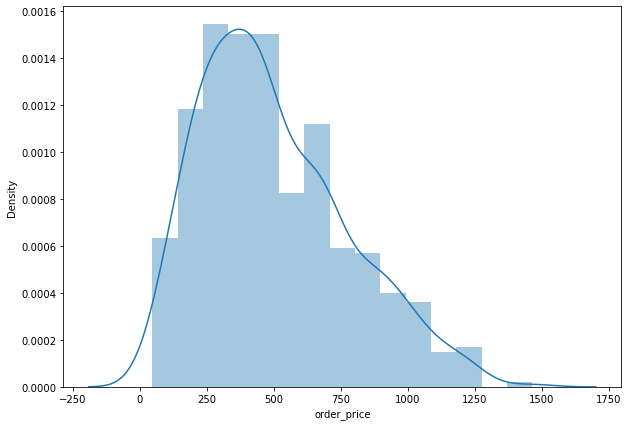

In [7]:
# The price distribution of the orders
fig = plt.figure(figsize=(10,7)) 
ax = sns.distplot(data['order_price'])

In [8]:
minPrice = min(data.order_price)
maxPrice = max(data.order_price)
print('Min order price :', minPrice)
print('Max order price :', maxPrice)

Min order price : 46.4
Max order price : 1465.5


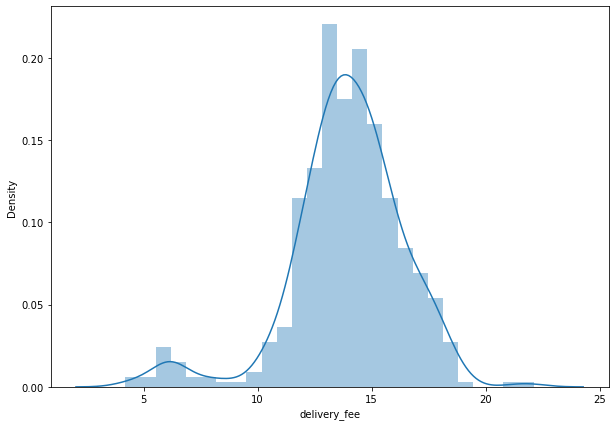

In [9]:
# The delivery fee distribution of the orders
fig = plt.figure(figsize=(10,7)) 
ax = sns.distplot(data['delivery_fee'])

In [10]:
minFee = min(data.delivery_fee)
maxFee = max(data.delivery_fee)
print('Min delivery fee :', minFee)
print('Max delivery fee :', maxFee)

Min delivery fee : 4.2074907
Max delivery fee : 22.1127494


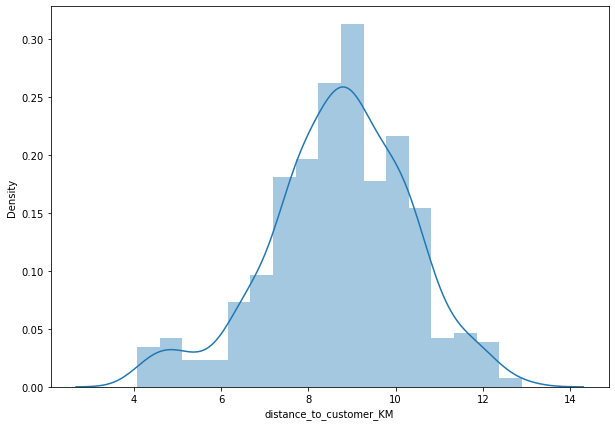

In [11]:
# The customer distance distribution of the orders
fig = plt.figure(figsize=(10,7)) 
ax = sns.distplot(data['distance_to_customer_KM'])

In [12]:
minDist = min(data.distance_to_customer_KM)
maxDist = max(data.distance_to_customer_KM)
print('Min Distance (in km) :', minDist)
print('Max Distance (in km) :', maxDist)

Min Distance (in km) : 4.077
Max Distance (in km) : 12.892


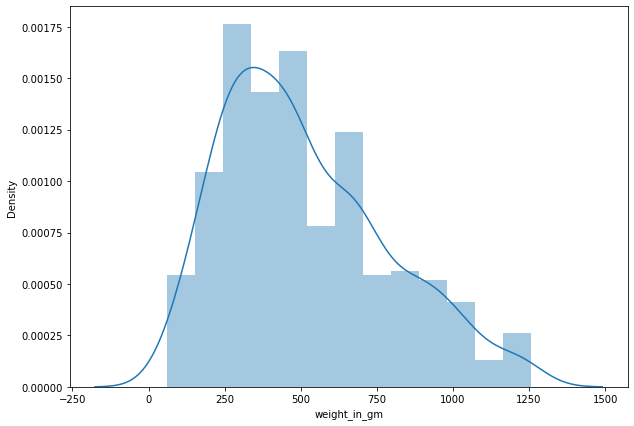

In [13]:
# The weight distribution of the orders
fig = plt.figure(figsize=(10,7)) 
ax = sns.distplot(data['weight_in_gm'])

In [14]:
minWeight = min(data.weight_in_gm)
maxWeight = max(data.weight_in_gm)
print('Min Weight (in gm) :', minWeight)
print('Max Weight (in gm) :', maxWeight)

Min Weight (in gm) : 59.5
Max Weight (in gm) : 1255.5


### Mapping: Get the address from the latitude and longitude

In [15]:
# Convert the latitudes and longitudes into string and append them into a list
latitudes = []
for lat in data['customer_lat']:
    latitudes.append(str(lat))

longitudes = []
for lon in data['customer_lon']:
    longitudes.append(str(lon))

In [16]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

In [17]:
def get_address(latitude, longitude):
    address = []
    for latitude in latitudes:
        for longitude in longitudes:
            # Get location with geocode
            location = geolocator.geocode(latitude + "," + longitude)
            address.append(str(location))
            return address

In [18]:
# Calling the function with custom values
get_address("12.9850", "77.5533")

['Government Aquarium, Kasturba Road, Shantala Nagar, Sampangiram Nagar Ward, East Zone, Bengaluru, Bangalore North, Bangalore Urban, Karnataka, 560001, India']

### Reverse Mapping: Get the latitude and longitude from the address

In [19]:
def get_latlon(address):
    # Provide the address
    location = geolocator.geocode(address)
    print("The latitude of the location is: ", location.latitude)
    print("The longitude of the location is: ", location.longitude)
    return (location.latitude, location.longitude)

In [20]:
# Calling the function with custom values
get_latlon("Government Aquarium, Kasturba Road, Shantala Nagar, Sampangiram Nagar Ward, East Zone, Bengaluru, Bangalore North, Bangalore Urban, Karnataka, 560001, India")

The latitude of the location is:  12.9763848
The longitude of the location is:  77.5985817305408


(12.9763848, 77.5985817305408)

### Plot the points on the map 

In [21]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [22]:
# First, pass in the median of the latitude and longitude coordinates so as to centre the map there
map1 = folium.Map(location=[data.customer_lat.median(), data.customer_lon.median()], tiles='cartodbpositron',
                  control_scale=True)


# Now, iterate through each row of the dataframe, and pass the latitude and longitudes to the map
for index, location_info in data.iterrows():
    folium.Marker([location_info['customer_lat'], location_info['customer_lon']], 
                  zoom_start=20, popup=location_info['distance_to_customer_KM']).add_to(map1)
    

# create a map
map1.save("map1.html")
# Displaying the map
map1

### Clustered Location on the map

In [23]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import math

In [24]:
# First, pass in the median of the latitude and longitude coordinates so as to centre the map there
map2 = folium.Map(location=[data.customer_lat.median(), data.customer_lon.median()], tiles='cartodbpositron',
                  zoom_start=13, control_scale=True)

# Adding points to the map
mc = MarkerCluster().add_to(map2)

for index, location_info in data.iterrows():
    folium.Marker([location_info['customer_lat'], location_info['customer_lon']]).add_to(mc)
folium.LayerControl().add_to(map2)

# Displaying the map
map2.save("map2.html")
map2

In [25]:
# Check if we have any null values
data.isnull().sum()

order_id                   0
customer_lat               0
customer_lon               0
distance_to_customer_KM    0
weight_in_gm               0
order_price                0
delivery_fee               0
dtype: int64

In [26]:
# check for categorical columns
cat_col = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['order_id']

In [27]:
print(data.shape)
data.head(5)

(500, 7)


,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_gm,order_price,delivery_fee
0,ORDC01406,12.9766,77.5993,8.335,818.2,140.80,13.700428
1,ORDZ10125,12.9770,77.5773,7.536,960.0,313.50,6.167473
2,ORDZ04175,12.9551,77.6593,9.860,1255.5,714.00,15.088928
3,ORDI03691,12.9473,77.5616,8.614,757.5,480.25,13.684368
4,ORDZ04094,12.9850,77.5533,8.802,381.0,497.75,13.760744


### Get the optimal number of Clusters

In [28]:
# Define the 'features' and 'labels'
X = data.iloc[:, 1:3]

In [29]:
X

,customer_lat,customer_lon
0,12.9766,77.5993
1,12.9770,77.5773
2,12.9551,77.6593
3,12.9473,77.5616
4,12.9850,77.5533
...,...,...
495,12.9770,77.5773
496,13.0487,77.5923
497,13.0019,77.5713
498,13.0019,77.5713


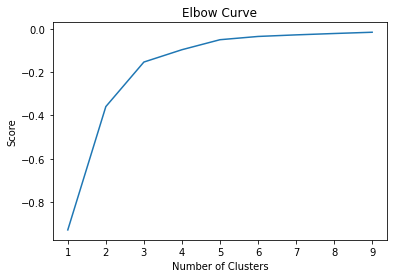

In [30]:
from sklearn.cluster import KMeans

kmeans = []
K_clusters = range(1,10)
for i in K_clusters:
    kmeans.append(KMeans(n_clusters=i))

Y_axis = X[['customer_lat']]
X_axis = X[['customer_lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [31]:
# When we graph the plot, we see that the graph levels off slowly after 3 clusters. 
# This implies that addition of more clusters will not help us that much.

### Clustering using K-Means and Assigning Clusters to our Data

In [32]:
# 'k-means++' selects initial cluster centers for k-means clustering in a smart way to speed up convergence
kmeans = KMeans(n_clusters = 3, init ='k-means++')

# Compute k-means clustering
kmeans.fit(X)
centers = kmeans.cluster_centers_
clusters = kmeans.predict(X)
X['cluster_label'] = clusters
X.head(10)

,customer_lat,customer_lon,cluster_label
0,12.9766,77.5993,1
1,12.9770,77.5773,1
2,12.9551,77.6593,2
3,12.9473,77.5616,0
4,12.9850,77.5533,1
5,12.9299,77.6848,2
6,12.9770,77.5773,1
7,12.9828,77.6131,1
8,12.9766,77.5993,1
9,12.9854,77.7081,2


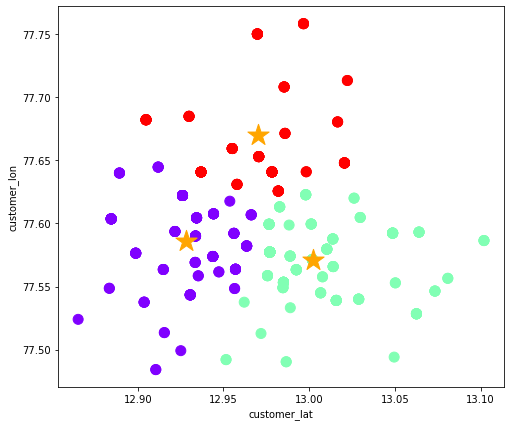

In [33]:
# Visualize the Clusters
plt.figure(figsize=(8,7))
plt.scatter(x=X['customer_lat'], y=X['customer_lon'], c=clusters, s=100, cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=500, marker='*')
plt.xlabel('customer_lat')
plt.ylabel('customer_lon')
plt.show()

In [34]:
kmeans.cluster_centers_

array([[12.92822987, 77.58600584],
       [13.00220265, 77.57107832],
       [12.970285  , 77.6698825 ]])

In [35]:
# distance to cluster center
X_dist = kmeans.transform(X.loc[:, ['customer_lat', 'customer_lon']])
X['distance_to_cluster_center'] = X_dist.sum(axis=1).round(3)

print(X.shape)
X.head(10)

(500, 4)


,customer_lat,customer_lon,cluster_label,distance_to_cluster_center
0,12.9766,77.5993,1,0.159
1,12.9770,77.5773,1,0.168
2,12.9551,77.6593,2,0.197
3,12.9473,77.5616,0,0.197
4,12.9850,77.5533,1,0.208
5,12.9299,77.6848,2,0.277
6,12.9770,77.5773,1,0.168
7,12.9828,77.6131,1,0.165
8,12.9766,77.5993,1,0.159
9,12.9854,77.7081,2,0.314


In [36]:
X = X.loc[:, ['cluster_label', 'distance_to_cluster_center']]

In [37]:
# Concat the dataframes
delivery = pd.concat([data, X], axis=1, join='inner')
print(delivery.shape)
delivery.head(10)

(500, 9)


,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_gm,order_price,delivery_fee,cluster_label,distance_to_cluster_center
0,ORDC01406,12.9766,77.5993,8.335,818.2,140.80,13.700428,1,0.159
1,ORDZ10125,12.9770,77.5773,7.536,960.0,313.50,6.167473,1,0.168
2,ORDZ04175,12.9551,77.6593,9.860,1255.5,714.00,15.088928,2,0.197
3,ORDI03691,12.9473,77.5616,8.614,757.5,480.25,13.684368,0,0.197
4,ORDZ04094,12.9850,77.5533,8.802,381.0,497.75,13.760744,1,0.208
5,ORDB10193,12.9299,77.6848,9.081,639.0,664.50,13.387529,2,0.277
6,ORDX00958,12.9770,77.5773,6.412,1041.0,413.40,12.007878,1,0.168
7,ORDI03630,12.9828,77.6131,7.759,441.0,998.50,16.251402,1,0.165
8,ORDI05755,12.9766,77.5993,8.996,738.5,146.25,14.114691,1,0.159
9,ORDZ08573,12.9854,77.7081,8.624,681.8,417.25,15.758749,2,0.314


### Converting Longitude and Latitude into Cartesian X and Y
#### ** R of earth =6371 KM **
#### x = R * cos( radiance(lat) ) * cos(radiance (lon))
#### y = R * cos( radiance(lat) ) * sin(radiance (lon))

In [38]:
from math import radians,cos,sin

lat = delivery["customer_lat"].map(radians)
lon = delivery["customer_lon"].map(radians)
x = lon.map(cos)*lat.map(cos)*6371
y= lon.map(cos)*lat.map(sin)*6371

delivery["lat_radians"] = lat
delivery["lon_radians"] = lon
delivery["x"] = x
delivery["y"] = y
delivery.head(5)

,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_gm,order_price,delivery_fee,cluster_label,distance_to_cluster_center,lat_radians,lon_radians,x,y
0,ORDC01406,12.9766,77.5993,8.335,818.2,140.80,13.700428,1,0.159,0.226484,1.354363,1333.214655,307.223394
1,ORDZ10125,12.9770,77.5773,7.536,960.0,313.50,6.167473,1,0.168,0.226491,1.353979,1335.540607,307.769201
2,ORDZ04175,12.9551,77.6593,9.860,1255.5,714.00,15.088928,2,0.197,0.226109,1.355410,1326.978932,305.262106
3,ORDI03691,12.9473,77.5616,8.614,757.5,480.25,13.684368,0,0.197,0.225973,1.353705,1337.361457,307.458841
4,ORDZ04094,12.9850,77.5533,8.802,381.0,497.75,13.760744,1,0.208,0.226631,1.353560,1338.037058,308.541249


In [39]:
new_df = delivery[['x','y']]
new_df.head(5)

,x,y
0,1333.214655,307.223394
1,1335.540607,307.769201
2,1326.978932,305.262106
3,1337.361457,307.458841
4,1338.037058,308.541249


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100), copy=True)
scaled_df = scaler.fit_transform(new_df)
scaled_df = pd.DataFrame(scaled_df, columns=['x', 'y'])

In [41]:
scaled = np.asarray(scaled_df)
scaled

array([[ 57.45487424,  47.25610621],
       [ 65.34953584,  53.98617125],
       [ 36.28981496,  23.07247782],
       [ 71.52979538,  50.15928939],
       [ 73.82289558,  63.50590466],
       [ 27.58134619,   8.23277426],
       [ 65.34953584,  53.98617125],
       [ 52.38511222,  44.88327098],
       [ 57.45487424,  47.25610621],
       [ 18.20750577,  17.03627292],
       [ 73.82289558,  63.50590466],
       [ 65.34953584,  53.98617125],
       [ 67.09440698,  31.77553044],
       [ 65.34953584,  53.98617125],
       [ 67.21131155,  45.49297744],
       [ 44.44890285,  10.07520106],
       [ 42.5162601 ,  35.26225889],
       [ 47.90947836,  40.89343015],
       [ 67.09440698,  31.77553044],
       [ 42.5162601 ,  35.26225889],
       [ 65.34953584,  53.98617125],
       [ 54.54544272,  60.88817023],
       [ 42.11722163,  40.95131897],
       [ 70.09462014,  62.65540382],
       [ 78.37114878,  50.80536676],
       [ 47.90947836,  40.89343015],
       [ 72.86178053,  47.63459281],
 

### Travelling Salesman problem

In [42]:
# Calculate the euclidian distance in n-space of the route r traversing cities c, ending at the path start.
path_distance = lambda r,c: np.sum([np.linalg.norm(c[r[p+1]]-c[r[p]]) for p in range(len(r)-1)])
# Reverse the order of all elements from element i to element k in array r.
two_opt_swap = lambda r,i,k: np.concatenate((r[0:i],r[k:-len(r)+i-1:-1],r[k+1:len(r)]))

# 2-opt Algorithm
def two_opt(cities,improvement_threshold):
    # Make an array of row numbers corresponding to cities.
    route = np.arange(cities.shape[0])
    improvement_factor = 1
    # Calculate the distance of the initial path.
    best_distance = path_distance(route,cities)
    # If the route is still improving, keep going!
    while improvement_factor > improvement_threshold:
        distance_to_beat = best_distance                                  # Record the distance at the beginning of the loop
        for swap_first in range(0,len(route)-2):                          # From each city except the first and last,
            for swap_last in range(swap_first+1,len(route)):              # to each of the cities following,
                new_route = two_opt_swap(route,swap_first,swap_last)      # try reversing the order of these cities
                new_distance = path_distance(new_route,cities)            # and check the total distance with this modification.
                # If the path distance is an improvement, make this the accepted best route.
                if new_distance < best_distance:
                    route = new_route
                    best_distance = new_distance
        # Calculate how much the route has improved.
        improvement_factor = 1 - best_distance/distance_to_beat
    # When the route is no longer improving substantially, stop searching and return the route.
    return route

In [43]:
# Find a good route with 2-opt ("route" gives the order in which to travel to each city by row number.)
route = two_opt(scaled, 0.001)
route

array([147, 377, 248, 276, 277, 221, 222, 257, 278, 255, 323, 365, 372,
       429,  62, 243, 236, 141, 116,  89,  90, 457, 456, 483, 166, 165,
       168, 169, 170, 296, 295, 292, 291, 290, 289, 288, 274, 244, 373,
       442, 140,  75, 245, 235, 322, 364, 374, 496, 434, 435, 275, 189,
       190, 151,  67, 129,  68, 155, 422, 426,  59,  55, 201,  27, 394,
        41, 408, 391, 363, 321,  54, 421, 402, 234,  35,  24,  80, 310,
       447, 223, 181, 311, 224, 313, 312, 226, 225,  26, 393,   3, 301,
       261, 262, 180, 179, 178, 177, 176, 493, 494, 495, 477, 462, 460,
       459, 455, 454, 451, 448, 445, 444, 150,  77,  78,  81,  84,  87,
        88,  92,  93,  95, 110, 126, 127, 128, 207, 256, 309, 186, 334,
       350, 381, 386,  57,  52,  51,  47,  46,  36, 424, 413, 414, 418,
       419, 403, 293, 304, 146,  20,  13,  11,   6,   1, 184, 183, 263,
        70, 149, 437,  29,  64,  74, 133, 132, 131, 130, 396, 431, 441,
       497, 498, 499,  42, 390, 409, 479, 185, 270, 271, 112,  2

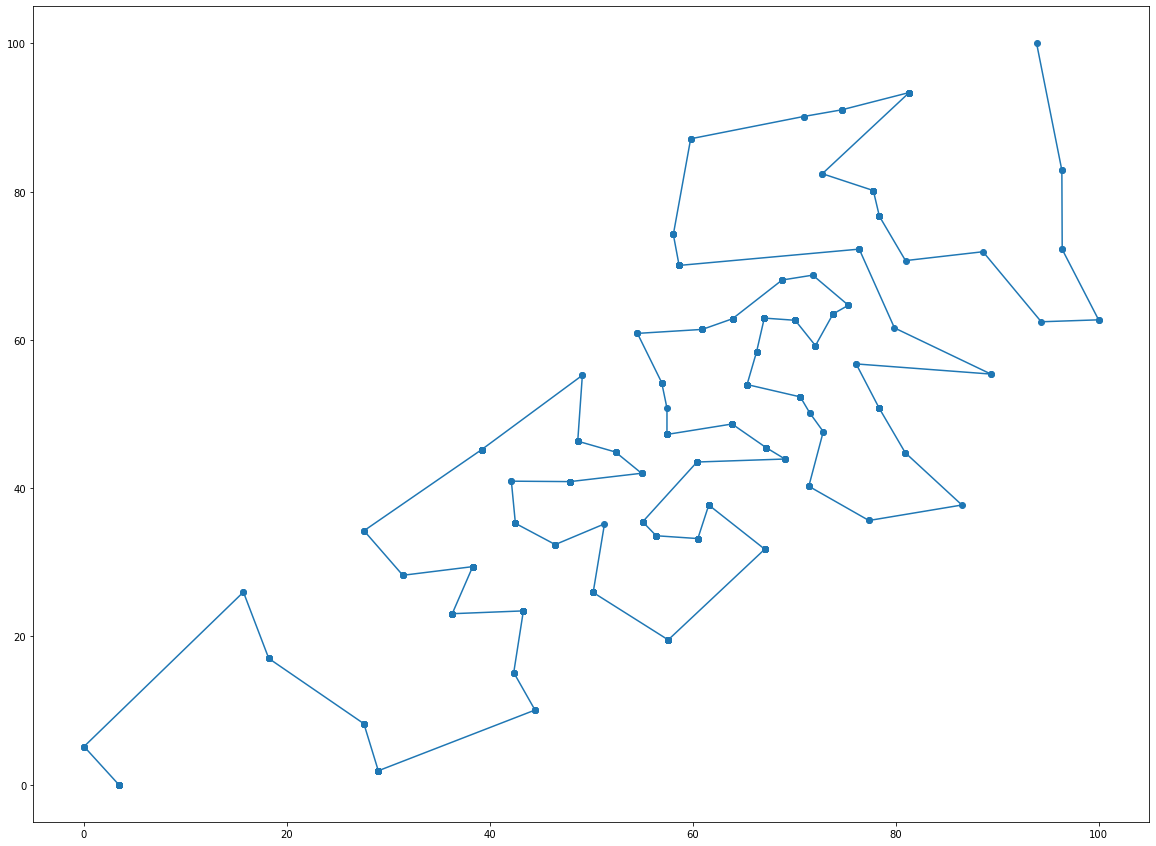

Distance_scaled: 586.3854543470916


In [44]:
plt.figure(figsize=(20,15))
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.array([scaled[route[i]] for i in range(len(route))])

# Plot the cities.
plt.scatter(scaled[:,0],scaled[:,1])

# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()

# Print the route as row numbers and the total distance travelled by the path.
print("Distance_scaled: " + str(path_distance(route,scaled)))

#### Arrange rows according to route matrix

In [45]:
delivery_order = pd.DataFrame(route, columns=["index"])
delivery_order

,index
0,147
1,377
2,248
3,276
4,277
...,...
495,458
496,469
497,472
498,473


In [46]:
delivery["index"] = delivery.index
travel = delivery_order.merge(delivery, on="index")
travel

,index,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_gm,order_price,delivery_fee,cluster_label,distance_to_cluster_center,lat_radians,lon_radians,x,y
0,147,ORDC06134,13.0496,77.4941,10.138,318.20,824.00,15.805228,1,0.435,0.227758,1.352527,1343.949639,311.500913
1,377,ORDZ07514,12.9866,77.4904,9.189,855.00,531.75,14.060896,1,0.374,0.226659,1.352463,1344.682723,310.113237
2,248,ORDJ06380,12.9866,77.4904,9.192,665.50,462.00,14.397661,1,0.374,0.226659,1.352463,1344.682723,310.113237
3,276,ORDI07206,12.9515,77.4921,9.112,952.60,467.80,14.790884,1,0.369,0.226046,1.352492,1344.692599,309.248051
4,277,ORDA07824,12.9515,77.4921,7.728,347.50,169.00,15.878096,1,0.369,0.226046,1.352492,1344.692599,309.248051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,458,ORDK05717,12.9698,77.7500,11.494,447.00,675.00,18.769927,2,0.431,0.226366,1.356993,1317.297911,303.390933
496,469,ORDA09472,12.9698,77.7500,11.204,208.25,459.00,18.116437,2,0.431,0.226366,1.356993,1317.297911,303.390933
497,472,ORDC06882,12.9698,77.7500,9.407,943.00,187.25,16.733950,2,0.431,0.226366,1.356993,1317.297911,303.390933
498,473,ORDI02372,12.9698,77.7500,10.318,654.20,383.50,16.494778,2,0.431,0.226366,1.356993,1317.297911,303.390933


In [47]:
travel.rename(columns = {'index':'delivery_allocation_order'}, inplace = True)

In [48]:
travel = travel[['order_id','customer_lat','customer_lon','distance_to_customer_KM','weight_in_gm',
                 'order_price','delivery_fee','cluster_label','delivery_allocation_order']]

In [49]:
travel = travel.sort_values(by=['delivery_allocation_order'], ascending=True)
travel

,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_gm,order_price,delivery_fee,cluster_label,delivery_allocation_order
250,ORDC01406,12.9766,77.5993,8.335,818.2,140.80,13.700428,1,0
152,ORDZ10125,12.9770,77.5773,7.536,960.0,313.50,6.167473,1,1
438,ORDZ04175,12.9551,77.6593,9.860,1255.5,714.00,15.088928,2,2
89,ORDI03691,12.9473,77.5616,8.614,757.5,480.25,13.684368,0,3
189,ORDZ04094,12.9850,77.5533,8.802,381.0,497.75,13.760744,1,4
...,...,...,...,...,...,...,...,...,...
100,ORDK00127,12.9770,77.5773,4.425,391.2,781.00,10.473663,1,495
47,ORDI03952,13.0487,77.5923,12.011,245.6,281.00,14.546491,1,496
169,ORDA09684,13.0019,77.5713,8.975,924.5,225.00,14.450127,1,497
170,ORDB05258,13.0019,77.5713,9.772,383.0,742.00,13.555158,1,498


In [50]:
travel.to_csv(r'C:\Users\Rajashri\Desktop\food_analysis\Package delivery\submissions.csv', index=False)
print("Successfully Exported!!")

Successfully Exported!!


### Get the first 10 orders to be allocated for delivery

In [51]:
# First 10 orders
first_ten = travel[['order_id','delivery_allocation_order']].head(10)
first_ten

,order_id,delivery_allocation_order
250,ORDC01406,0
152,ORDZ10125,1
438,ORDZ04175,2
89,ORDI03691,3
189,ORDZ04094,4
474,ORDB10193,5
151,ORDX00958,6
397,ORDI03630,7
245,ORDI05755,8
479,ORDZ08573,9
